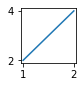

In [1]:
# For some reason this seems to be necessary in anaconda to stop matplotlib crashing
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(1,1))
plt.plot([1,2],[2,4])
plt.show()

In [1]:
# Now import everything else
import numpy as np
import pylab
import time
import scipy
from scipy.interpolate import interp2d
from numpy import arange
import os
from PIL import Image

# Camera Object

In [3]:
# Make a camera object
#from CamFLIR import CamFLIR
from CamHamThread import CamHamThread
cam=CamHamThread(exposure=0.5,SensitivityGain=4,CCDMode="NormalCCD")



In [4]:
#This is how you take a photo
img=cam.Snap(1) 


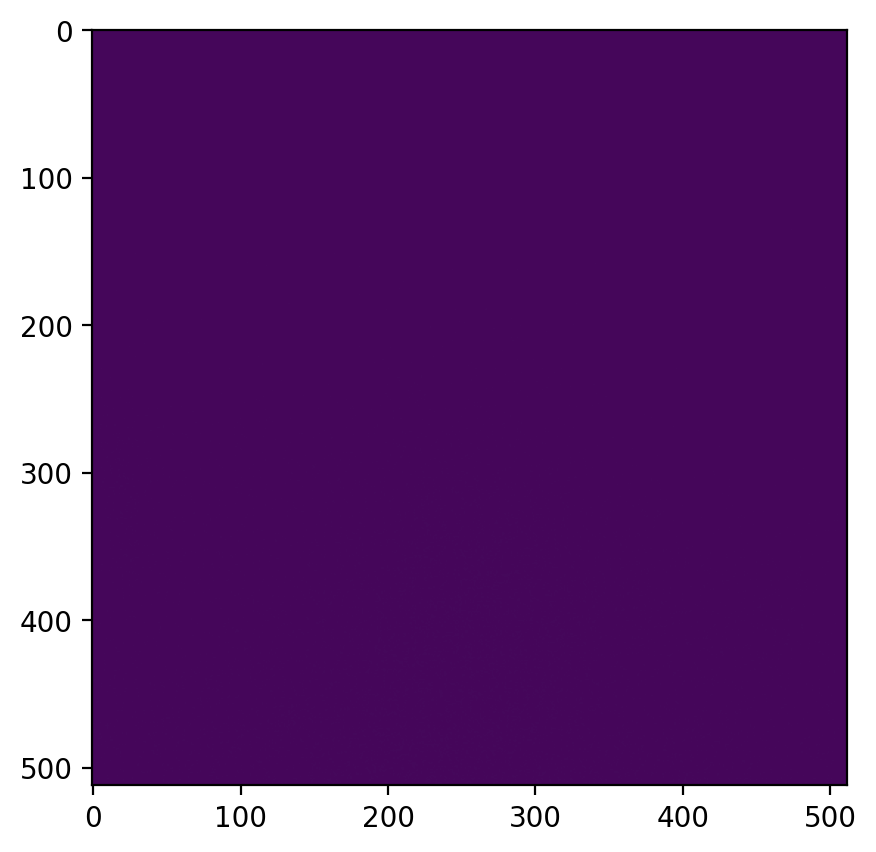

In [5]:
#and plot it
plt.figure(figsize=(5,5),dpi=200)
pylab.imshow(img[0],clim=(200,100000))

# Stage Object

In [2]:
#Initiate a stage object
from Stage import Stage
stg=Stage()
print("completed")

completed


3.45
3.4511111111111115
3.4522222222222223
3.4533333333333336
3.4544444444444444
3.4555555555555557
3.4566666666666666
3.457777777777778
3.4588888888888887
3.46
[array([[2052., 2069., 2044., ..., 2050., 2051., 2053.],
       [2067., 2058., 2041., ..., 2060., 2068., 2048.],
       [2040., 2051., 2068., ..., 2059., 2062., 2064.],
       ...,
       [2088., 2101., 2152., ..., 2106., 2124., 2102.],
       [2106., 2096., 2138., ..., 2119., 2112., 2138.],
       [2126., 2136., 2132., ..., 2073., 2116., 2094.]]), array([[2066., 2069., 2045., ..., 2067., 2049., 2051.],
       [2056., 2026., 2061., ..., 2051., 2056., 2072.],
       [2044., 2057., 2048., ..., 2020., 2040., 2029.],
       ...,
       [2104., 2099., 2112., ..., 2124., 2119., 2136.],
       [2080., 2108., 2116., ..., 2096., 2097., 2088.],
       [2114., 2080., 2125., ..., 2140., 2094., 2116.]]), array([[2064., 2034., 2080., ..., 2060., 2052., 2052.],
       [2066., 2050., 2032., ..., 2038., 2050., 2064.],
       [2060., 2094., 2056

C:\Users\ohs2758\Documents\GitHub\MicroscopeControlSuite\AutoFocusMicroSpheres.py:79: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.axvline(x=thousandthLargestVal, ymin=0, ymax=1, color='orange', Label = "thousandthLargestVal")
C:\Users\ohs2758\Documents\GitHub\MicroscopeControlSuite\AutoFocusMicroSpheres.py:79: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.axvline(x=thousandthLargestVal, ymin=0, ymax=1, color='orange', Label = "thousandthLargestVal")
C:\Users\ohs2758\Documents\GitHub\MicroscopeControlSuite\AutoFocusMicroSpheres.py:79: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.axvline(x=thousandthLargestVal, ymin=0, ymax=1, color='orange', Label = "thousandthLargestVal")
C:\Users\ohs2758\Documents\GitHub\

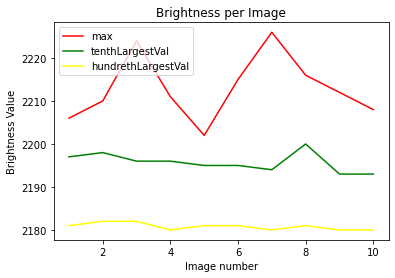

Sucessfully AutoFocused at  3.457777777777778


In [3]:
#test AF funtion, initiate stg object first
from AutoFocusMicroSpheres import AutoFocusMicroSpheres
af = AutoFocusMicroSpheres(exposure=1, CCDMode='Normal')

Zs=np.linspace(3.45,3.46,10)

autofocusZ=af.Autofocus(Zs, stg, showthem=True)
stg.MoveToZ(autofocusZ)

In [4]:
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  0 0 3.457777777777778


In [ ]:
#Move in X and into focus
#time.sleep(5)
stg.MoveToX(-1.289)
stg.MoveToY(0)
#stg.MoveToZ(3.529)

#Query position
print("Stage at ",stg.X,stg.Y,stg.Z)

In [ ]:
FocalPoints=[]
FocalPoints.append([0,0,3.4656])
FocalPoints.append([1,1,3.4800])
FocalPoints.append([1,0,3.4707])
FocalPoints.append([0,1,3.4754])
FocalPoints=np.array(FocalPoints)

stg.DefineFocalPlane(FocalPoints)

In [ ]:
def DefineFocalPlane(FocalPoints):
    FocalPlane=interp2d(FocalPoints[:,0],FocalPoints[:,1],FocalPoints[:,2])
    
def FocusAt(x,y):
    stg.MoveToX(x)
    stg.MoveToY(y)
    stg.MoveToZ(FocalPlane(x,y)[0])
    

def BigImageSweep(xmin,xmax,xstep,ymin,ymax,ystep):
    xs= np.arange(xmin,xmax,xstep)
    ys= np.arange(ymin,ymax,ystep)
    fig=plt.figure(figsize=(8,8),dpi=150)
    gs = fig.add_gridspec(len(xs), len(ys), hspace=0, wspace=0)
    axes= gs.subplots(sharex='col', sharey='row')
    pics={}
    for ix in range(0,len(xs)):
        for iy in range(0,len(ys)):
            x=xs[ix]
            y=ys[iy]
            stg.FocusAt(x,y)
            time.sleep(0.5)
            pics[x,y]=cam.Snap(1)[0]
            axes[ix][iy].imshow(pics[x,y])
            #plt.figure(figsize=(4,4),dpi=100)
            #plt.imshow(pics[x,y])
    return pics

In [ ]:
pics=BigImageSweep(0,0.1,0.02,0,0.1,0.02)

In [ ]:
for k in pics.keys():
    plt.figure(figsize=(4,4),dpi=100)
    plt.imshow(pics[k])

In [ ]:
pics

In [ ]:
#time.sleep(1)
stg.MoveToX(-6.3)
stg.MoveToY(-0.6)
stg.MoveToZ(3.4565)


#Query position
print("Stage at ",stg.X,stg.Y,stg.Z)

# Scan Example

In [ ]:
zVal = []
def MakeImageSweepBrian(Zs,numX,filename,showthem=True):#showthem=True removed
    
    # Put the images in this array
    pics=[]
    numZ =0
    
    for i in range(0,len(Zs)):
        
        
        # Move stage
        stg.MoveToZ(Zs[i])
        
        #Snap a pic
        #pics.append(cam.Snap(1)[0])
        cam.Snap(1)[0]
        plt.figure(figsize=(5,5),dpi=200)
        pylab.imshow(img[0],clim=(200,100000))
        numZ+=1
        
        
        
        plt.savefig(filename+ '/'+'X_Position_'+str(numX)+'image__'+ str(numZ))
            
        print(Zs[i])
        zVal.append(Zs[i])
        time.sleep(.3)
        

    return pics

In [ ]:
def MakeImageSweep(Zs,showthem=True):
    
    # Put the images in this array
    pics=[]
    
    for i in range(0,len(Zs)):
        
        # Move stage
        stg.MoveToZ(Zs[i])
        
        #Snap a pic
        #image = pics.append(cam.Snap(1)[0])
        #do some function to save this image to a file
        #open("xy.dat",'w')
        
        time.sleep(.5)
    return pics

# AutoFocus on Microspheres

In [5]:

import os
import numpy as np
import matplotlib.pyplot as plt

def autofocus(start, end, numPics):
    Zs=np.linspace(float(start),float(end),float(numPics))
    pics=MakeImageSweep(Zs,numX,showthem=True)

    arrayMax = []
    arrayTenthLargestVal=[]
    arrayHundrethLargestVal =[]
    numarray=[]
    num =0

    for pic in pics:

        # create the histogram
        num+=1
        numarray.append(num)

        imarray = np.asarray(pic)
        imarray=imarray.flatten()
        plt.figure()

        maxValue=np.max(imarray)
        arrayMax.append(maxValue)
        minValue=np.min(imarray)
        xmax=maxValue
        xmin=minValue
        tenthLargestVal=np.partition(imarray, -10)[-10]
        optimize = tenthLargestVal
        arrayTenthLargestVal.append(optimize)
        hundrethLargestVal = np.partition(imarray, -100)[-100]
        arrayHundrethLargestVal.append(hundrethLargestVal)
        thousandthLargestVal = np.partition(imarray, -1000)[-1000]
        tenthousandthLargestVal = np.partition(imarray, -10000)[-10000]
        plt.axvline(x=xmax, ymin=0, ymax=1, color ='red', label="max")
        plt.axvline(x=xmin, ymin=0, ymax=1, color='blue',label = "min")
        plt.axvline(x=tenthLargestVal, ymin=0, ymax=1, color='green', label = "tenthLargestVal")
        plt.axvline(x=hundrethLargestVal, ymin=0, ymax=1, color='yellow', label = "hundrethLargestVal")
        plt.axvline(x=thousandthLargestVal, ymin=0, ymax=1, color='orange', Label = "thousandthLargestVal")
        plt.axvline(x=tenthousandthLargestVal, ymin=0, ymax=1, color='pink', label = "tenthousandthLargestVal")
        plt.legend(loc="upper left")

        (n, bins, patches) = plt.hist(imarray, bins=10**np.logspace(np.log10(.1),np.log10(5.0), 256), histtype='stepfilled')
        plt.yscale('symlog')
        plt.xscale('log')
        plt.title("Grayscale Histogram")
        plt.xlabel("grayscale value")
        plt.ylabel("pixels")
        plt.xlim(1000,100000)
        plt.ylim(1, 1000000)
        plt.savefig(r"C:\Users\ohs2758\Documents\plots"+ str(num))
        plt.close()

    plt.figure()
    plt.plot(numarray,arrayMax, color ='red',label="max")
    plt.plot(numarray,arrayTenthLargestVal, color ='green',label = "tenthLargestVal")
    plt.plot(numarray,arrayHundrethLargestVal, color ='yellow',label = "hundrethLargestVal")
    plt.title("Brightness per Image")
    plt.xlabel("Image number")
    plt.ylabel("Brightness Value")
    plt.legend(loc="upper left")
    plt.show()

    MaxTenthBrightestVal=np.max(arrayTenthLargestVal)
    indexTenthVal = arrayTenthLargestVal.index(MaxTenthBrightestVal)

    stg.MoveToZ(zVal[indexTenthVal])
    print("AutoFocused")


In [ ]:
afMicrospheres=autofocus(3.45,3.46,10)

# Brian Project

In [ ]:
numX=1
Zs=np.linspace(3.45,3.46,10)
pics=MakeImageSweep(Zs,numX,showthem=True)

In [ ]:
#PATH = "C:\Users\ohs2758\Documents\microscope captures\CNN_trainingData"
#copyToPath = "C:\Users\ohs2758\Documents\microscope captures\Dump"
x = 1
y = 0
Zs=np.linspace(3.54,3.55,50)
incrementX = 0.1
spanX = 1


numX=0
for i in arange(x,x+spanX,incrementX):
    #leaf = 'Sweep_' + str(numZ)+ 'image_'+str(numX))
    filename = 'C:/Users/ohs2758/Documents/GitHub\MicroscopeControlSuite/Brian_training_data/' + 'Sweep_' + str(numX)
    #path = os.path.join(parent,leaf)
    os.makedirs(filename)
        
    #with open('%d/%d.png' % (numX,numZ), 'w+') as f:
    #   f.write(img)
    numX+=1
    
    stg.MoveToX(i)
    time.sleep(0.3)
    pics=MakeImageSweepBrian(Zs,numX,filename,showthem=True)
    
    print("Stage at ",stg.X,stg.Y,stg.Z)
    
        

# Manuel GUI

In [5]:

import sys
import random
import matplotlib 
matplotlib.use('Qt5Agg')
import os
import numpy as np

from PyQt5 import QtCore, QtWidgets

from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure


def newest(path):
    files = os.listdir(path)
    paths = [os.path.join(path, basename) for basename in files]
    return max(paths, key=os.path.getctime)

class MplCanvas(FigureCanvas):

    def __init__(self, parent=None, width=5, height=4, dpi=100):
        fig = Figure(figsize=(width, height), dpi=dpi)
        self.axes = fig.add_subplot(111)
        super(MplCanvas, self).__init__(fig)


class MainWindow(QtWidgets.QMainWindow):

    def __init__(self, *args, **kwargs):
        super(MainWindow, self).__init__(*args, **kwargs)

        self.canvas = MplCanvas(self, width=5, height=4, dpi=100)
        self.setCentralWidget(self.canvas)

        self.figure = Figure(figsize=(5, 3))
        self.canvas = FigureCanvas(self.figure)
        self.ax = self.figure.subplots()

    
        self.update_plot()


        file=newest(r"C:/Users/ohs2758/Documents/GitHub/MicroscopeControlSuite/buffer")
        image = np.loadtxt(file)
        self.ax.imshow(image)
        self.ax.set_axis_off()
        self.setCentralWidget(self.canvas)

        self.show()

        # Setup a timer to trigger the redraw by calling update_plot.
        self.timer = QtCore.QTimer()
        self.timer.setInterval(1000)
        self.timer.timeout.connect(self.update_plot)
        self.timer.start()
        
        
    def update_plot(self):
     
        file=newest(r"C:/Users/ohs2758/Documents/GitHub/MicroscopeControlSuite/buffer")
        image = np.loadtxt(file)
        self.ax.imshow(image)
        
        print("Checked")
        
        self.canvas.draw()

    


app = QtWidgets.QApplication(sys.argv)
w = MainWindow()
app.exec_()

Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked
Checked


0

In [6]:
def newest(path):
    files = os.listdir(path)
    paths = [os.path.join(path, basename) for basename in files]
    return max(paths, key=os.path.getctime)



def printImg(name):
    image = np.loadtxt(name)
    pylab.imshow(image)
    plt.show()
    
    
file = newest(r"C:/Users/ohs2758/Documents/GitHub/MicroscopeControlSuite/buffer")   

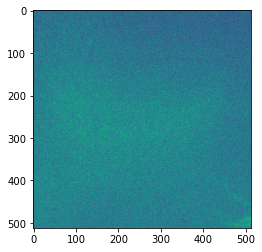

In [7]:
printImg(file)

In [ ]:
bufferPath= '/c/Users/ohs2758/Documents/GitHub/MicroscopeControlSuite/buffer'


In [ ]:
#This is how you take a photo
img=cam.Snap(1) 
#and plot it
plt.figure(figsize=(5,5),dpi=200)
pylab.imshow(img[0],clim=(200,100000))

In [ ]:
for i in range(0,len(pics)):
    #Optionally display them
    plt.figure(figsize=(5,5))
    plt.imshow(pics[i])
    plt.title(Zs[i])
    plt.clim(2000,5000)

In [ ]:
Integrals=[sum(sum(p)) for p in pics]
plt.figure(figsize=(5,5),dpi=150)
plt.xlabel("Z pos (mm)")
plt.ylabel("Intensity (arb)")
plt.plot(Zs,Integrals)